Import libraries, read csv, and check data shape.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Ritz_Jager_Data.csv')
df.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel_type                        119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal_type                         119390 non-null object
country_origin                    118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

***Check missing values***

In [3]:
df.isnull().sum()

hotel_type                             0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal_type                              0
country_origin                       488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Fill missing values with 'UNKNOWN' for country column and median for agent column.
Then, drop company column due to high amount of missing values.

In [4]:
df.fillna({'country_origin':'UNKNOWN', 'agent':df.agent.median()}, inplace=True)
df = df.drop('company', axis=1)

df.isnull().sum()

hotel_type                        0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal_type                         0
country_origin                    0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

***1. Where do the guests come from?***

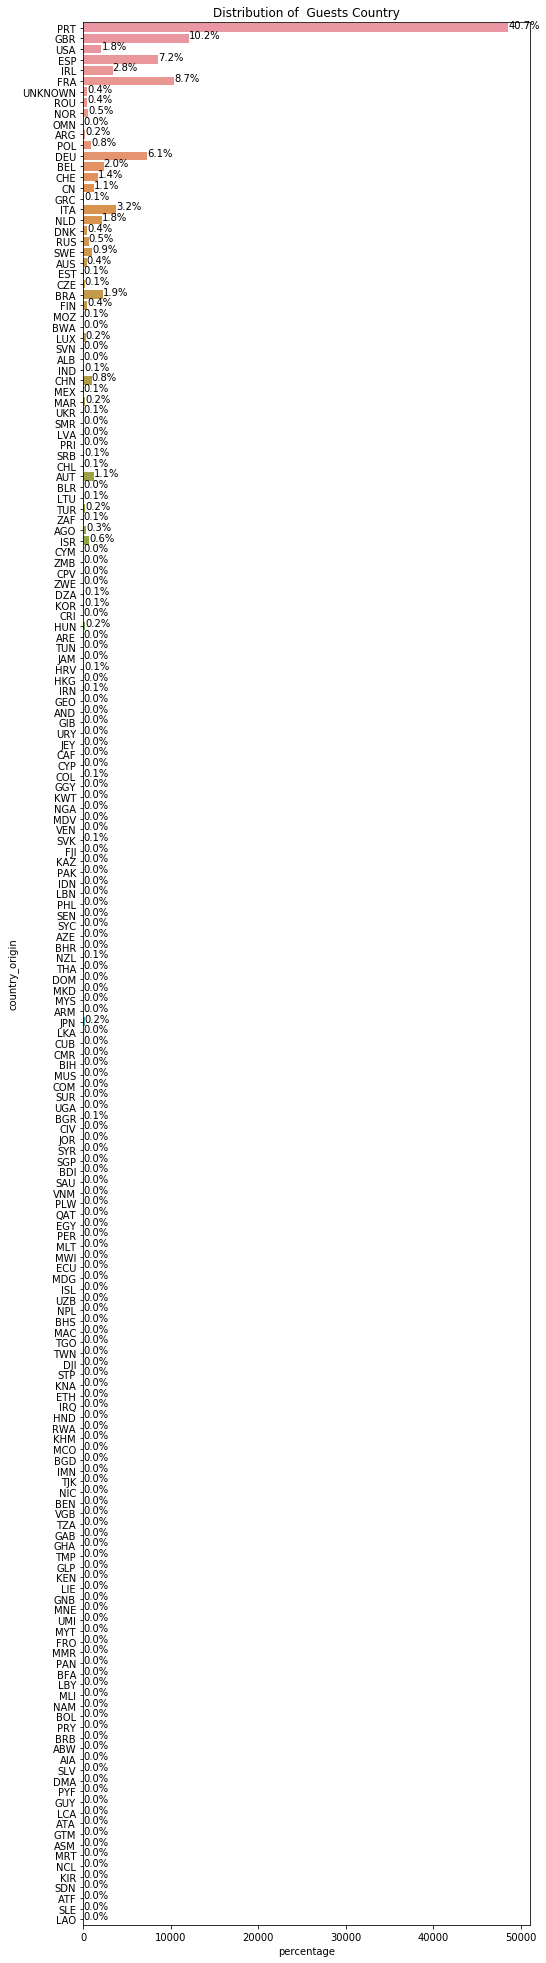

In [5]:
plt.figure(figsize=(8,35))
ax = sns.countplot(y='country_origin', data=df)
plt.title('Distribution of  Guests Country')
plt.xlabel('percentage')

total = len(df['country_origin'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

***2. How much do guests pay for a room per night?***

Calculate adr per person

First, check if there are any  booking entries with 0 adults and 0 children (logically it is not possible for babies to book by themeselves).

In [6]:
df[(df['adults']==0)&(df['children']==0)]

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,1,No Deposit,14.0,0,Transient-Party,0.00,0,0,Check-Out,6/10/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,12/10/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,23/11/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,4/1/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,5/1/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,30/6/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0,No Deposit,14.0,0,Transient,0.00,1,1,Check-Out,1/7/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,17/7/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,22/7/2017


Fill these entries adult column with 1 (at least an adult is required to book the hotel).

In [7]:
df.loc[(df['adults']==0)&(df['children']==0), 'adults'] = 1

In [8]:
df['adr_pp'] = df['adr'] / (df['adults']+df['children']) #calculate adr per person

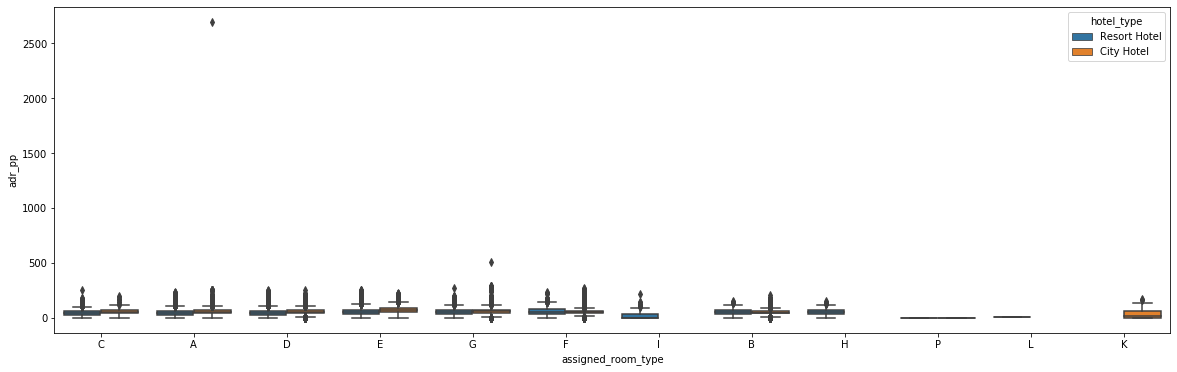

In [9]:
plt.figure(figsize=(20,6))
sns.boxplot(x='assigned_room_type', y='adr_pp', hue='hotel_type', data=df)

There are some extremely large outliers (greater than 500), these outliers is removed.

In [10]:
df[df['adr_pp']>500]

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,19/2/2016,2700.0
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,No Deposit,159.0,0,Transient,510.0,0,0,Check-Out,10/5/2017,510.0


In [11]:
df.drop(df[df['adr_pp']>500].index, inplace=True) #remove extreme outliers

Text(0.5, 1.0, 'adr per person distribution for each hotel type')

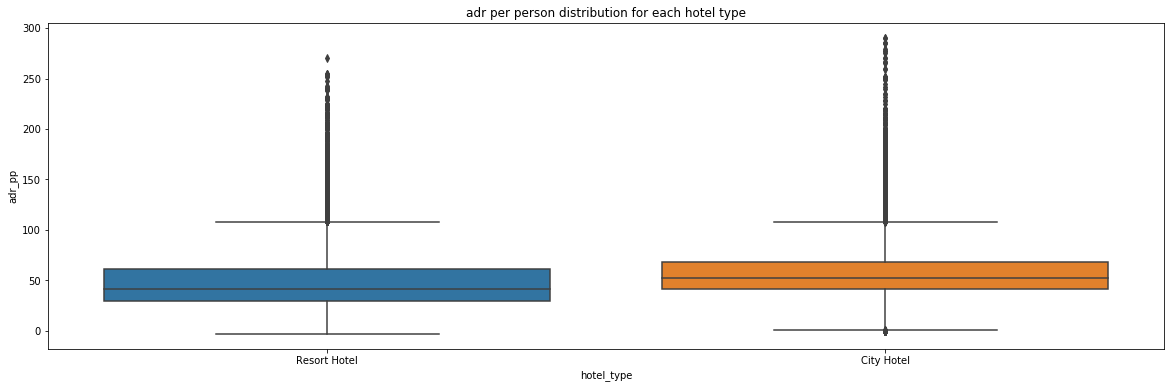

In [12]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x='hotel_type', y='adr_pp', data=df)
ax.set_title('adr per person distribution for each hotel type')

In [13]:
df_city = df[df['hotel_type']=='City Hotel']
df_resort = df[df['hotel_type']=='Resort Hotel']

overall_adr_mean = df['adr_pp'].mean()
city_adr_median = df_city['adr_pp'].mean()
resort_adr_median = df_resort['adr_pp'].mean()

print('On average, guests paid {:.2f} per room per night, which consists of Resort Hotel {:.2f} per room per night, and City Hotel {:.2f} per room per night.'.format(overall_adr_mean, city_adr_median, resort_adr_median))

On average, guests paid 55.03 per room per night, which consists of Resort Hotel 58.35 per room per night, and City Hotel 48.47 per room per night.


***3. How does the price per night vary over the year?***

Calculate adr per person mean groupped by hotel type, arrival year, and arrival month.

In [14]:
adr_per_month = pd.DataFrame(df.groupby(['hotel_type','arrival_date_year','arrival_date_month'])['adr_pp'].mean())
adr_per_month = adr_per_month.reset_index()
adr_per_month['arrival_date_year'] = adr_per_month['arrival_date_year'].astype('int64')
month_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
adr_per_month['arrival_date_month'] = pd.Categorical(adr_per_month['arrival_date_month'], categories=month_ordered, ordered=True)
adr_per_month

,hotel_type,arrival_date_year,arrival_date_month,adr_pp
0,City Hotel,2015,August,40.968758
1,City Hotel,2015,December,47.759575
2,City Hotel,2015,July,37.554137
3,City Hotel,2015,November,52.340929
4,City Hotel,2015,October,55.955215
5,City Hotel,2015,September,60.935001
6,City Hotel,2016,April,54.332639
7,City Hotel,2016,August,54.536010
8,City Hotel,2016,December,48.780637
9,City Hotel,2016,February,47.958372


Text(0.5, 1.0, 'average adr per person monthly')

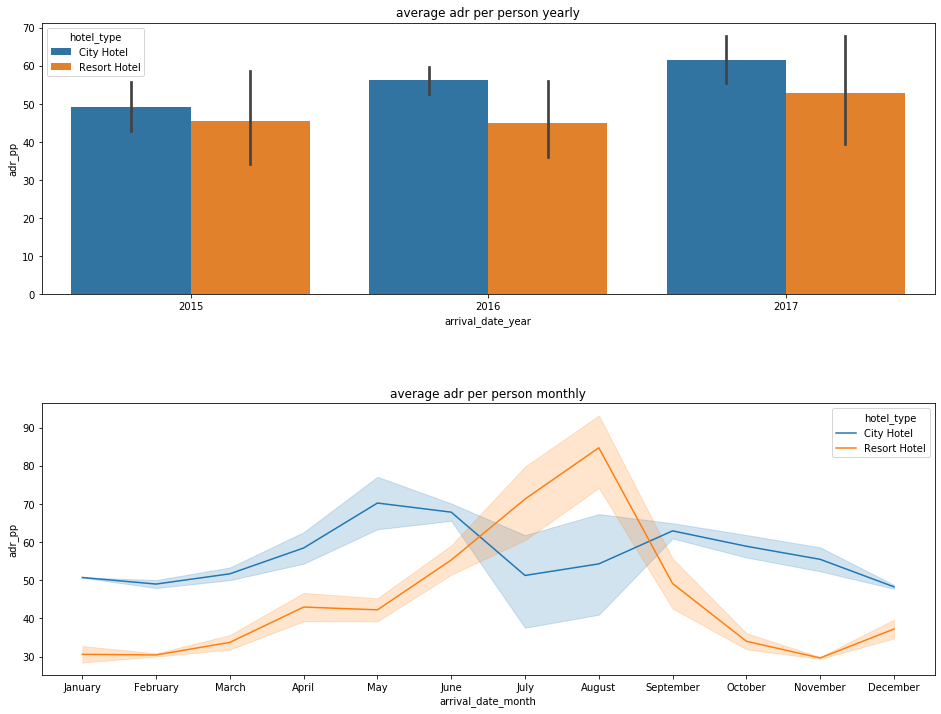

In [15]:
fig, axs = plt.subplots(2,1,figsize=(16,12))
plt.subplots_adjust(hspace = 0.4)
ax1 = sns.barplot(x='arrival_date_year', y='adr_pp', hue='hotel_type', data=adr_per_month, ax=axs[0])
ax1.set_title('average adr per person yearly')
ax2 = sns.lineplot(x='arrival_date_month', y='adr_pp', hue='hotel_type', data=adr_per_month, ax=axs[1])
ax2.set_title('average adr per person monthly')

***4. Which are the busiest months?***

Count number of bookings groupped by arrival month, reservation status, and hotel type. Then, select only succesful booking (check-out). The busiest month is on August.

In [16]:
busy_month = pd.DataFrame(df.groupby(['arrival_date_month', 'reservation_status', 'hotel_type'])['arrival_date_year'].count())
busy_month = busy_month.reset_index()
busy_month['arrival_date_month'] = pd.Categorical(busy_month['arrival_date_month'], categories=month_ordered, ordered=True)
busy_month = busy_month[busy_month['reservation_status']=='Check-Out']
busy_month

,arrival_date_month,reservation_status,hotel_type,arrival_date_year
2,April,Check-Out,City Hotel,4015
3,April,Check-Out,Resort Hotel,2550
8,August,Check-Out,City Hotel,5381
9,August,Check-Out,Resort Hotel,3257
14,December,Check-Out,City Hotel,2392
15,December,Check-Out,Resort Hotel,2017
20,February,Check-Out,City Hotel,3064
21,February,Check-Out,Resort Hotel,2308
26,January,Check-Out,City Hotel,2254
27,January,Check-Out,Resort Hotel,1868


Text(0.5, 1.0, 'Number of Guests in Months for Hotel Types')

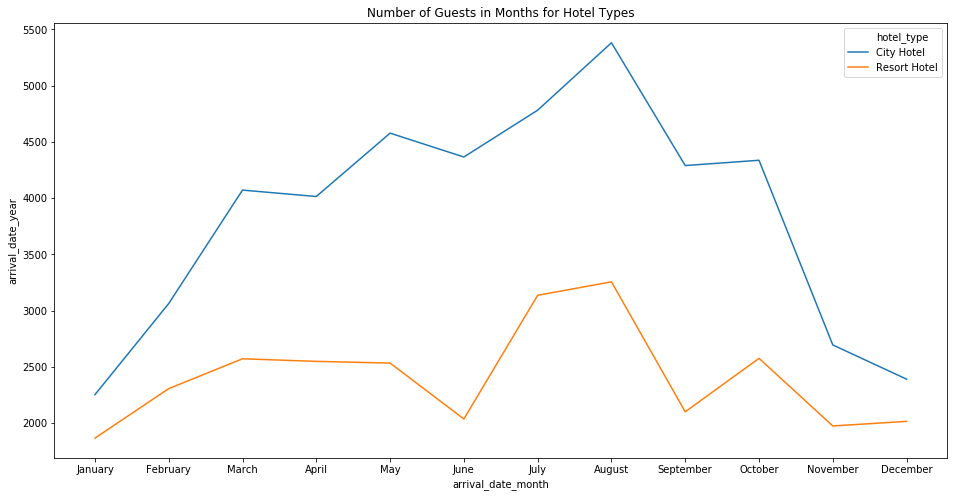

In [17]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='arrival_date_month', y='arrival_date_year', hue='hotel_type', data=busy_month)
ax.set_title('Number of Guests in Months for Hotel Types')

**5. How long do people stay at the hotels?**

Calculate total stay by adding weekend stays and weekday stays. On average, guests stayed for 3 days.

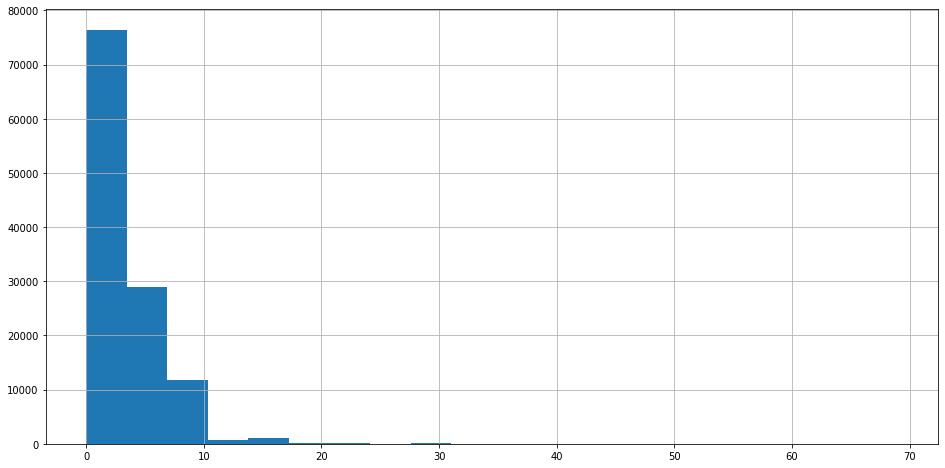

In [18]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

plt.figure(figsize=(16,8))
df['total_stay'].hist(bins=20)

In [19]:
print('On average, guests stayed for {:.0f} days'.format(df['total_stay'].median()))

On average, guests stayed for 3 days


***6. Bookings by market segment***

Online TA has the biggest proportion amongst other market segments across the year. During summer season, this market segment made larger gap to the others.

In [20]:
market = pd.DataFrame(df.groupby(['arrival_date_month', 'market_segment', 'hotel_type'])['arrival_date_year'].count())
market = market.reset_index()
market['arrival_date_month'] = pd.Categorical(market['arrival_date_month'], categories=month_ordered, ordered=True)
market

,arrival_date_month,market_segment,hotel_type,arrival_date_year
0,April,Aviation,City Hotel,41
1,April,Complementary,City Hotel,36
2,April,Complementary,Resort Hotel,20
3,April,Corporate,City Hotel,151
4,April,Corporate,Resort Hotel,230
...,...,...,...,...
151,September,Groups,Resort Hotel,610
152,September,Offline TA/TO,City Hotel,2086
153,September,Offline TA/TO,Resort Hotel,885
154,September,Online TA,City Hotel,2565


Text(0.5, 1.0, 'Hotel Type Number of Bookings Based on Market Segments')

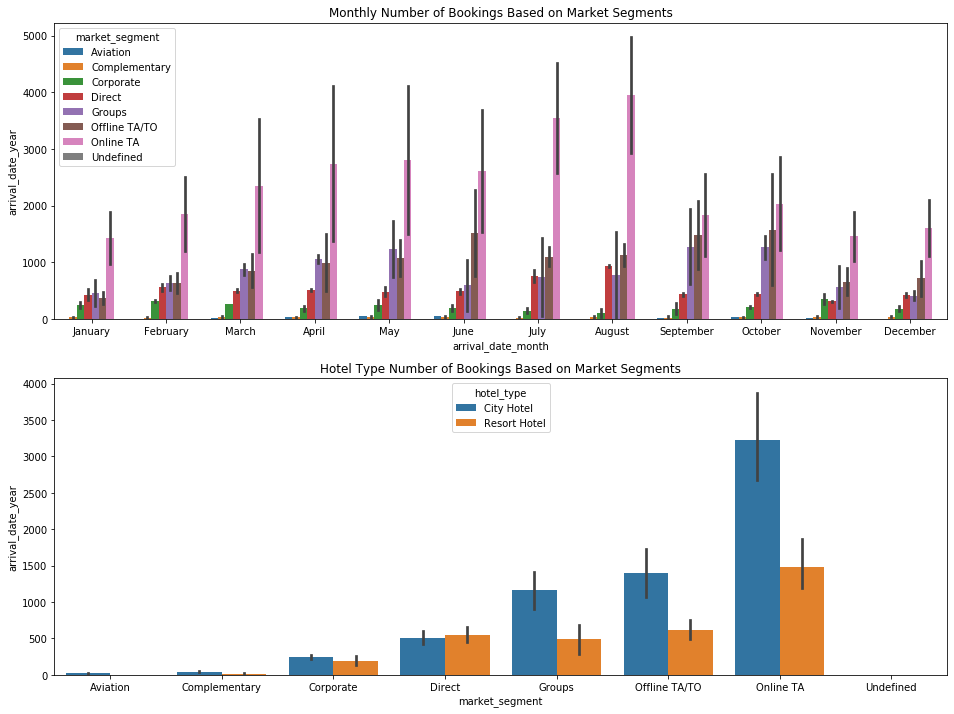

In [21]:
fig, axs = plt.subplots(2,1,figsize=(16,12))
ax1 = sns.barplot(x='arrival_date_month', y='arrival_date_year', hue='market_segment', data=market, ax=axs[0])
ax1.set_title('Monthly Number of Bookings Based on Market Segments')
ax2 = sns.barplot(x='market_segment', y='arrival_date_year', hue='hotel_type', data=market, ax=axs[1])
ax2.set_title('Hotel Type Number of Bookings Based on Market Segments')

**7. How many bookings were canceled?**

Count bookings groupped bymonth, status, and hotel type. Select canceled bookings and sum.

In [22]:
busy_month = pd.DataFrame(df.groupby(['arrival_date_month', 'reservation_status', 'hotel_type'])['arrival_date_year'].count())
busy_month = busy_month.reset_index()
busy_month['arrival_date_month'] = pd.Categorical(busy_month['arrival_date_month'], categories=month_ordered, ordered=True)
canceled = busy_month[busy_month['reservation_status']=='Canceled']

total_canceled = canceled['arrival_date_year'].sum()
cancel_percentage = total_canceled / busy_month['arrival_date_year'].sum()

print('{:.2f}% of the books are canceled. There are {} books canceled.'.format(cancel_percentage, total_canceled))

0.36% of the books are canceled. There are 43016 books canceled.


**8. Which month has the highest number of cancellations?**

Text(0.5, 1.0, 'Monthly Canceled Bookings')

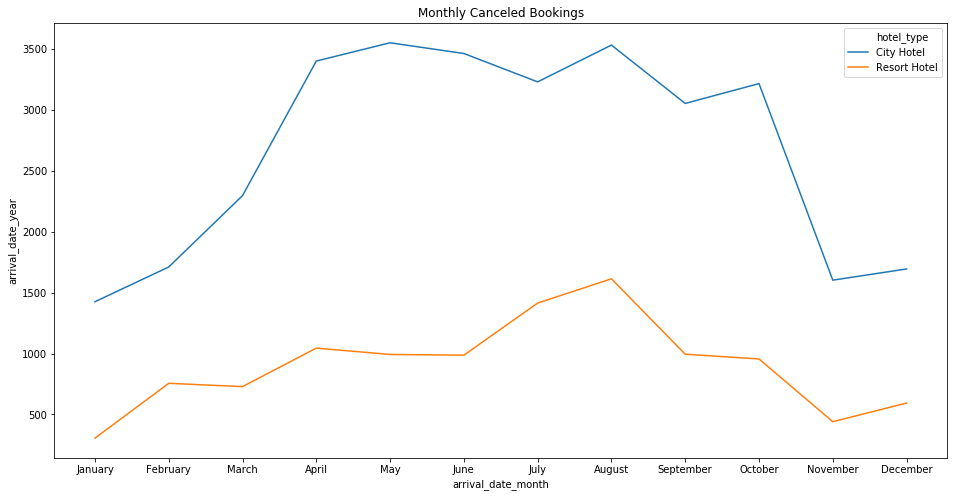

In [23]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='arrival_date_month', y='arrival_date_year', hue='hotel_type', data=canceled)
ax.set_title('Monthly Canceled Bookings')

In [24]:
total_cancel = pd.DataFrame(canceled.groupby('arrival_date_month')['arrival_date_year'].sum())
total_cancel = total_cancel.reset_index()
max_cancel = total_cancel[total_cancel['arrival_date_year'] == total_cancel['arrival_date_year'].max()]
print('{} is the month with highest number of cancelations, {} canceled bookings in total.'.format(max_cancel.iloc[0,0], max_cancel.iloc[0,1]))

August is the month with highest number of cancelations, 5147 canceled bookings in total.
